# US School Analysis

## Notes


## Assumptions
- pd.concat() was causing problems by simply appending one DF to the other and generating a DF that was twice as large but mostly full of nulls. I used pd.merge() instead and this fixed the problem.

## Imports

In [442]:
# Include all your imports here
import pandas as pd
from pathlib import Path


## Read Data

In [443]:
# Load the Public school dataset
resource_path = Path(".\Resources\public_school_data.csv")
df_data = pd.DataFrame(pd.read_csv(resource_path))
df_data

,NCESSCH,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH
0,10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0
1,10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0
2,10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0
3,10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0
4,10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100717,780003000024,VI,Elementary,Regular school,328.0,26.0,12.62,NaN,7.0,254.0,NaN,59.0,2.0,6.0
100718,780003000026,VI,Elementary,Regular school,477.0,25.0,19.08,1.0,4.0,394.0,2.0,64.0,3.0,9.0
100719,780003000027,VI,Elementary,Regular school,397.0,29.0,13.69,1.0,7.0,322.0,1.0,57.0,NaN,9.0
100720,780003000033,VI,Middle,Regular school,763.0,62.0,12.31,1.0,7.0,583.0,NaN,153.0,1.0,18.0


In [444]:
# Load the Public school data dictionary file
resource_path = Path(".\Resources\school_data_dictionary.csv")
df_dictionary = pd.DataFrame(pd.read_csv(resource_path))
df_dictionary

,Fields,Field Descriptions
0,OBJECTID,OBJECTID
1,Shape,Shape
2,NCESSCH,Unique School ID
3,SURVYEAR,Year corresponding to survey record
4,STABR,Postal state abbreviation code
...,...,...
73,WHALM,All Students - White - Male
74,WHALF,All Students - White - Female
75,WH,All Students - White
76,LATCOD,Latitude


In [445]:
# Load the Public school locations dataset
resource_path = Path(".\Resources\public_school_locations.csv")
df_locations = pd.DataFrame(pd.read_csv(resource_path))
df_locations

,ID,LATCOD,LONCOD
0,10000500870,34.260200,-86.206200
1,10000500871,34.262200,-86.204900
2,10000500879,34.273300,-86.220100
3,10000500889,34.252700,-86.221806
4,10000501616,34.289800,-86.193300
...,...,...,...
100717,780003000024,18.341950,-64.917602
100718,780003000026,18.338742,-64.952483
100719,780003000027,18.354782,-64.899024
100720,780003000033,18.336658,-64.945940


## Data Exploration and Preparation

In [446]:
# Use an .isin() function to keep only columns in df_data which match field names in df_dictionary.
df_temp = df_data.columns.isin(df_dictionary["Fields"])
count_index = 0
for col in df_temp:
    if col == False:
        print(df_data.columns[count_index] + " not found in dictionary. Dropping column.")
        df_data.columns.drop(df_data.columns[count_index], inplace=True)
    count_index += 1

# Identify the unique ID column. Rename columns as you see fit.
# According to the school_data_dictionary.csv file, NCEESSCH is the unique school ID.
df_data.rename(inplace=True, columns={"NCESSCH": "SCHOOL_ID", 
                        "LSTATE": "STATE",
                        "FTE": "TOTAL_TEACHERS",
                        "STUTERATIO": "STUDENT_TEACHER_RATIO",
                        "AM": "ABORIGINAL_ALASKAN",
                        "AS": "ASIAN",
                        "BL": "BLACK",
                        "HP": "HAWAIIAN_POLYNESIAN",
                        "HI": "HISPANIC",
                        "TR": "MULTIRACIAL",
                        "WH": "WHITE"
                        })

df_locations.rename(inplace=True, columns={"ID": "SCHOOL_ID",
                                           "LATCOD": "LATITUDE",
                                           "LONCOD": "LONGITUDE"
                                           })

In [447]:
# Ensure the column you selected is indeed a unique identifier by checking the number of uniqe values and comparing it to the number of rows in the dataframe
if df_data["SCHOOL_ID"].count() == df_data["SCHOOL_ID"].nunique():
    print("School ID column is in correct shape.")
    print("Number of rows: " + str(df_data["SCHOOL_ID"].count()))
    print("Number of unique values: " + str(df_data["SCHOOL_ID"].nunique()))
    
else:
    print("School ID column has one or more missing rows, or some other problem.")
    print("Number of rows: " + str(df_data["SCHOOL_ID"].count()))
    print("Number of unique values: " + str(df_data["SCHOOL_ID"].nunique()))

School ID column is in correct shape.
Number of rows: 100722
Number of unique values: 100722


In [448]:
# Change the names of the unique ID column in both the location data and public school data to match and set them as index
df_data.set_index("SCHOOL_ID")
df_locations.set_index("SCHOOL_ID")

,LATITUDE,LONGITUDE
SCHOOL_ID,,
10000500870,34.260200,-86.206200
10000500871,34.262200,-86.204900
10000500879,34.273300,-86.220100
10000500889,34.252700,-86.221806
10000501616,34.289800,-86.193300
...,...,...
780003000024,18.341950,-64.917602
780003000026,18.338742,-64.952483
780003000027,18.354782,-64.899024


In [449]:
# Check your work
df_data.head()

,SCHOOL_ID,STATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,TOTAL_TEACHERS,STUDENT_TEACHER_RATIO,ABORIGINAL_ALASKAN,ASIAN,BLACK,HAWAIIAN_POLYNESIAN,HISPANIC,MULTIRACIAL,WHITE
0,10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0
1,10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0
2,10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0
3,10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0
4,10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0


In [450]:
# Check your work
df_locations.head()

,SCHOOL_ID,LATITUDE,LONGITUDE
0,10000500870,34.2602,-86.206200
1,10000500871,34.2622,-86.204900
2,10000500879,34.2733,-86.220100
3,10000500889,34.2527,-86.221806
4,10000501616,34.2898,-86.193300


In [451]:
# Join the location and data dataframes together
#df_dat_loc = pd.concat([df_data, df_locations], axis="index")
df_dat_loc = pd.merge(df_data, df_locations, on="SCHOOL_ID", how="left")
df_dat_loc


,SCHOOL_ID,STATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,TOTAL_TEACHERS,STUDENT_TEACHER_RATIO,ABORIGINAL_ALASKAN,ASIAN,BLACK,HAWAIIAN_POLYNESIAN,HISPANIC,MULTIRACIAL,WHITE,LATITUDE,LONGITUDE
0,10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0,34.260200,-86.206200
1,10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0,34.262200,-86.204900
2,10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0,34.273300,-86.220100
3,10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0,34.252700,-86.221806
4,10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0,34.289800,-86.193300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100717,780003000024,VI,Elementary,Regular school,328.0,26.0,12.62,NaN,7.0,254.0,NaN,59.0,2.0,6.0,18.341950,-64.917602
100718,780003000026,VI,Elementary,Regular school,477.0,25.0,19.08,1.0,4.0,394.0,2.0,64.0,3.0,9.0,18.338742,-64.952483
100719,780003000027,VI,Elementary,Regular school,397.0,29.0,13.69,1.0,7.0,322.0,1.0,57.0,NaN,9.0,18.354782,-64.899024
100720,780003000033,VI,Middle,Regular school,763.0,62.0,12.31,1.0,7.0,583.0,NaN,153.0,1.0,18.0,18.336658,-64.945940


In [452]:
# Get the value counts for the school type column
school_type_counts = df_dat_loc["SCHOOL_TYPE_TEXT"].value_counts()
print(school_type_counts)

SCHOOL_TYPE_TEXT
Regular school                  91595
Alternative Education School     5588
Special education school         1946
Career and Technical School      1593
Name: count, dtype: int64


In [453]:
# Create a subset of the dataframe that only includes regular schools ensure it was successful by comparing rows in the subset to the value counts above
#df_regulars = pd.DataFrame(data=df_dat_loc, index=[df_data_loc["SCHOOL_TYPE_TEXT"] == "Regular school"])
df_regulars = pd.DataFrame(df_dat_loc)
df_regulars = df_regulars[df_regulars["SCHOOL_TYPE_TEXT"] == "Regular school"]
df_regulars

,SCHOOL_ID,STATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,TOTAL_TEACHERS,STUDENT_TEACHER_RATIO,ABORIGINAL_ALASKAN,ASIAN,BLACK,HAWAIIAN_POLYNESIAN,HISPANIC,MULTIRACIAL,WHITE,LATITUDE,LONGITUDE
0,10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0,34.260200,-86.206200
1,10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0,34.262200,-86.204900
2,10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0,34.273300,-86.220100
3,10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0,34.252700,-86.221806
4,10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0,34.289800,-86.193300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100717,780003000024,VI,Elementary,Regular school,328.0,26.0,12.62,NaN,7.0,254.0,NaN,59.0,2.0,6.0,18.341950,-64.917602
100718,780003000026,VI,Elementary,Regular school,477.0,25.0,19.08,1.0,4.0,394.0,2.0,64.0,3.0,9.0,18.338742,-64.952483
100719,780003000027,VI,Elementary,Regular school,397.0,29.0,13.69,1.0,7.0,322.0,1.0,57.0,NaN,9.0,18.354782,-64.899024
100720,780003000033,VI,Middle,Regular school,763.0,62.0,12.31,1.0,7.0,583.0,NaN,153.0,1.0,18.0,18.336658,-64.945940


## Data Cleaning and dealing with nulls

In [454]:
# For each column, check if the number of non-null values is equal to the number of rows.
# If there are nulls, replace them with a sensible value (0 for math; otherwise dropped).
num_rows = df_regulars["SCHOOL_ID"].size
math_cols = ["TOTAL", "TOTAL_TEACHERS", "STUDENT_TEACHER_RATIO", "ABORIGINAL_ALASKAN", "ASIAN", "BLACK", "HAWAIIAN_POLYNESIAN", "HISPANIC", "MULTIRACIAL", "WHITE", "LATITUDE", "LONGITUDE"]
for col in df_regulars.columns:
    if df_regulars[col].count() != num_rows:
        if col in math_cols:
            # Replace with 0s
            df_regulars[col].fillna(0, inplace=True)
        else:
            # Drop nulls
            df_regulars[col].dropna(inplace=True)
        

In [455]:
# Verify changes to nulls and no nulls should remain
df_regulars

,SCHOOL_ID,STATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,TOTAL_TEACHERS,STUDENT_TEACHER_RATIO,ABORIGINAL_ALASKAN,ASIAN,BLACK,HAWAIIAN_POLYNESIAN,HISPANIC,MULTIRACIAL,WHITE,LATITUDE,LONGITUDE
0,10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0,34.260200,-86.206200
1,10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0,34.262200,-86.204900
2,10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0,34.273300,-86.220100
3,10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0,34.252700,-86.221806
4,10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0,34.289800,-86.193300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100717,780003000024,VI,Elementary,Regular school,328.0,26.0,12.62,0.0,7.0,254.0,0.0,59.0,2.0,6.0,18.341950,-64.917602
100718,780003000026,VI,Elementary,Regular school,477.0,25.0,19.08,1.0,4.0,394.0,2.0,64.0,3.0,9.0,18.338742,-64.952483
100719,780003000027,VI,Elementary,Regular school,397.0,29.0,13.69,1.0,7.0,322.0,1.0,57.0,0.0,9.0,18.354782,-64.899024
100720,780003000033,VI,Middle,Regular school,763.0,62.0,12.31,1.0,7.0,583.0,0.0,153.0,1.0,18.0,18.336658,-64.945940


## Plotting to help Clean the Data

<Axes: ylabel='Total students'>

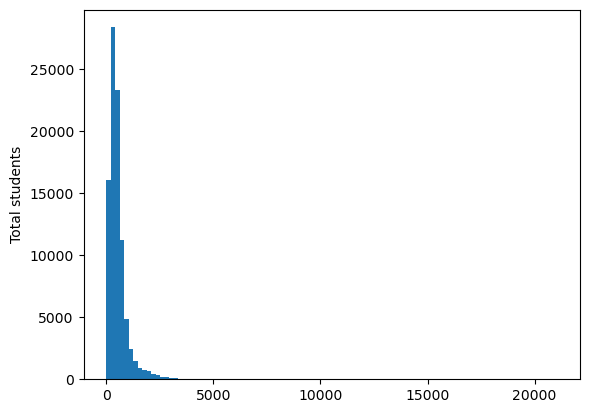

In [456]:
# Plot a histogram of Total enrolled students and check for outliers
df_regulars["TOTAL"].plot(kind="hist", bins=100, ylabel="Total students")

<Axes: ylabel='Total teachers'>

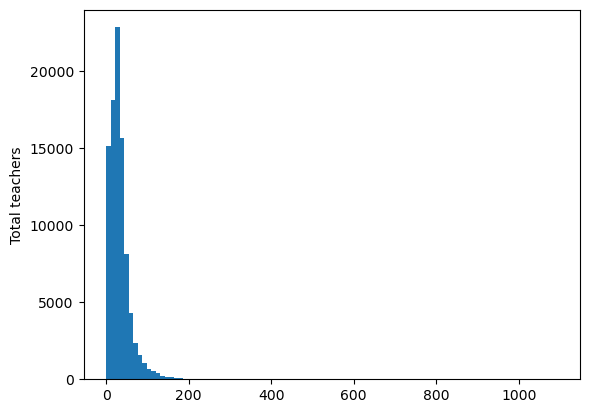

In [457]:
# Plot a histogram of Total Teachers and check for outliers
df_regulars["TOTAL_TEACHERS"].plot(kind="hist", bins=100, ylabel="Total teachers")

<Axes: ylabel='Student-Teacher ratio'>

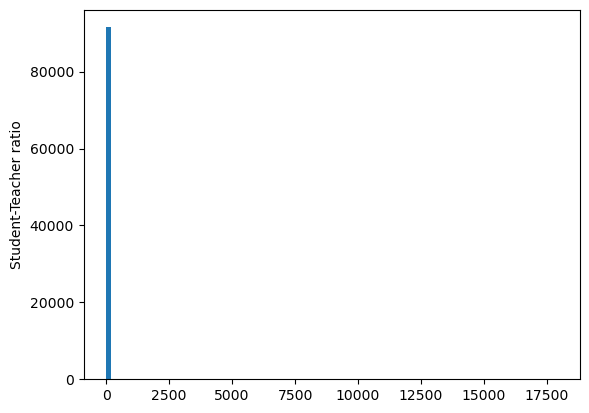

In [458]:
# Plot a histogram of Student Teacher Ratio and check for outliers
df_regulars["STUDENT_TEACHER_RATIO"].plot(kind="hist", bins=100, ylabel="Student-Teacher ratio")

<Axes: ylabel='Total students'>

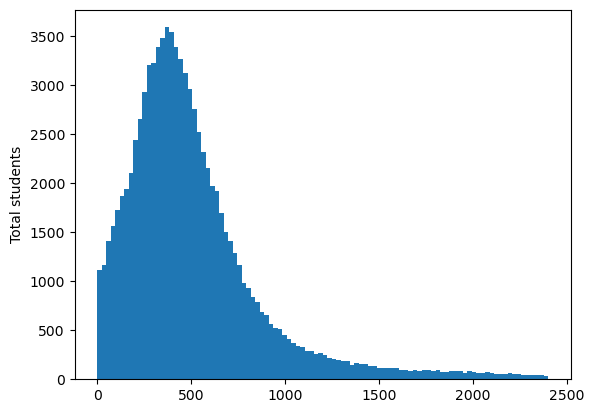

In [459]:
# Re-Plot a histogram of Total enrolled students after removing 0s and outliers above the 99th quantile
df_total_filtered = pd.DataFrame(data=df_regulars)
df_total_filtered = df_total_filtered[df_total_filtered["TOTAL"] > 0]

quantile = df_total_filtered["TOTAL"].quantile(0.99)
df_total_filtered = df_total_filtered[df_total_filtered["TOTAL"] <= quantile]
df_total_filtered["TOTAL"].plot(kind="hist", bins=100, ylabel="Total students")



<Axes: ylabel='Total teachers'>

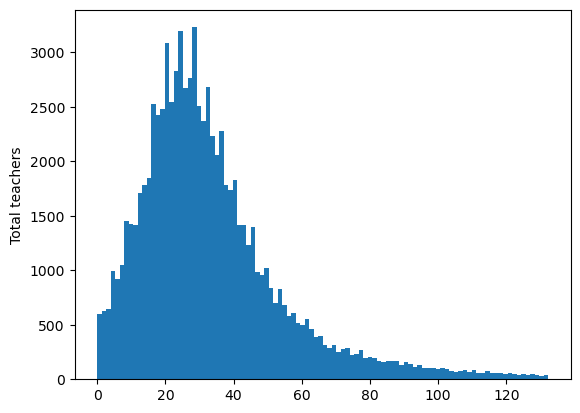

In [460]:
# Re-Plot a histogram of Total Teachers after removing 0s and outliers above the 99th quantile
df_total_teachers_filtered = pd.DataFrame(data=df_regulars)
df_total_teachers_filtered = df_total_teachers_filtered[df_total_teachers_filtered["TOTAL_TEACHERS"] > 0]

quantile = df_total_teachers_filtered["TOTAL_TEACHERS"].quantile(0.99)
df_total_teachers_filtered = df_total_teachers_filtered[df_total_teachers_filtered["TOTAL_TEACHERS"] <= quantile]
df_total_teachers_filtered["TOTAL_TEACHERS"].plot(kind="hist", bins=100, ylabel="Total teachers")



<Axes: ylabel='Student-teacher ratio'>

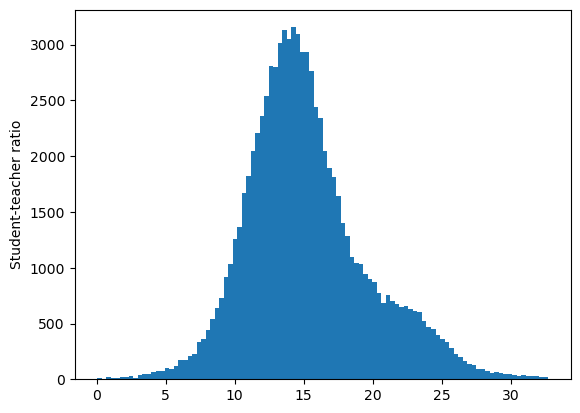

In [461]:
# Re-Plot a histogram of Student Teacher Ratio after removing 0s and outliers above the 99th quantile
df_ratio_filtered = pd.DataFrame(data=df_regulars)
df_ratio_filtered = df_ratio_filtered[df_ratio_filtered["STUDENT_TEACHER_RATIO"] > 0]

quantile = df_ratio_filtered["STUDENT_TEACHER_RATIO"].quantile(0.99)
df_ratio_filtered = df_ratio_filtered[df_ratio_filtered["STUDENT_TEACHER_RATIO"] <= quantile]
df_ratio_filtered["STUDENT_TEACHER_RATIO"].plot(kind="hist", bins=100, ylabel="Student-teacher ratio")





## Correlation Plot to Understand Data Relationships

In [462]:
# Use seaborn to generate a correlation heatmap for the columns in the dataframe





## Geographic Plots

In [463]:
# Plot only schools from the 48 contiguous US states or the 50 US states (drop territories and PR)





In [464]:
# Plot only schools in your state





## School Quality Analysis: Student/Teacher Ratios

In [465]:
# Use the dataframe that has filtered out the outliers in Student Teacher Ratio and group by state and get the average
# Show the highest 5 Student/Teacher ratios and lowest 5 Student/Teacher ratios as well as the average for your state



In [466]:
# What is the mean of the Student/Teacher Ratio


In [467]:
# What is the standard deviation of the Student/Teacher Ratio


In [468]:
# Plot the states ratios in descending order


In [469]:
# Plot a boxplot of the Student/Teacher Ratios


In [470]:
# List or Plot the Highest 5 states



In [471]:
# List or plot the lowest 5



In [472]:
# Print your state's Student Teacher Ratios



## Summarize your findings from any of the analysis or plots above:
* Were there any interesting Correlations?
* How did your state compare to others?
* Would you have made any different decisions in the earlier cleaning stages after becoming more familiar with the data?
* What is going on in IL?
* What other analysis could be done with this data?

## BONUS: Generate other interesting analysis or plots

In [473]:
# Your code below
